# Visión por Computadora 1
## TP 4 
## Alumno: Santiago Fux

In [190]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


#### Para las imágenes suministradas:


##### 1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)


In [191]:
#defino parametros
lbp_kernel_rad = 3
min_r = np.uint32(lbp_kernel_rad / 2)

In [192]:
def lbp(i):
  # obtengo dimensiones de la imagen
  h, w = i.shape
  # inicializo matriz de resultados
  res = np.zeros([h, w])
  # obtengo el lbp para cada pixel
  for y in range(h):
    for x in range(w):
      res[y, x] = calculate_lbp(i, x, y, lbp_kernel_rad)
  return res
  

In [193]:
def calculate_lbp(i, x, y, r):
  # obtengo dimensiones
  h, w = i.shape  
  # valor por default
  res = 0
  # print(f'x={x},y={y}')
  y_i = int(y - min_r)
  y_f = int(y + min_r + 1)
  x_i = int(x - min_r)
  x_f = int(x + min_r + 1)
  if x_i >= 0 and x_f < w and y_i >= 0 and y_f < h: 
    # obtengo matriz con los datos a procesar
    m = i[y_i:y_f, x_i:x_f]
    res = get_lbp_number(m, i[y, x])
  return res

In [194]:
# devuelvo 1 si es mayor o igual, 0 de otra forma
def is_greater(a, b):
  if a >= b:
    return 1
  return 0

# calculo código binario según valor y posición
def get_lbp_number(m, c):
  res = is_greater(m[1, 0], c) << 0
  res += is_greater(m[2, 0], c) << 1
  res += is_greater(m[2, 1], c) << 2
  res += is_greater(m[2, 2], c) << 3
  res += is_greater(m[1, 2], c) << 4
  res += is_greater(m[0, 2], c) << 5
  res += is_greater(m[0, 1], c) << 6
  res += is_greater(m[0, 0], c) << 7
  return res


proceso imagen Imagen2.png
proceso imagen Imagen3.png
proceso imagen Imagen4.png
proceso imagen Imagen5.png


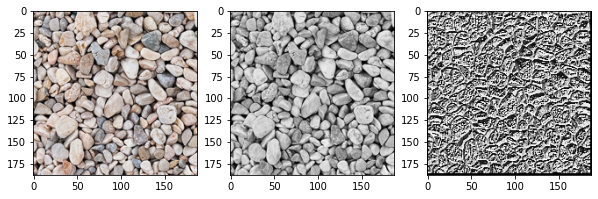

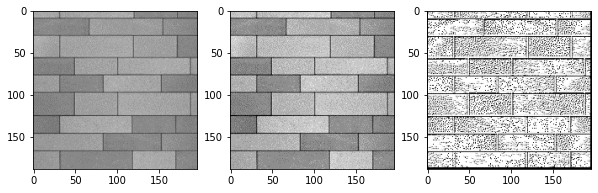

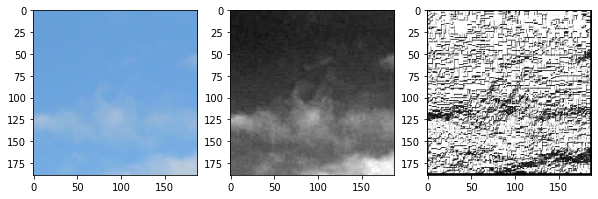

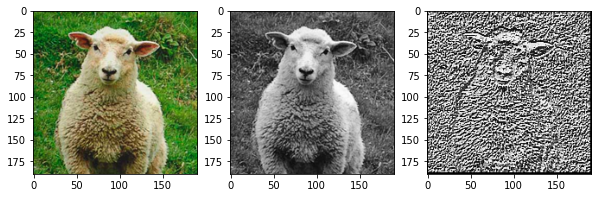

In [195]:
# cargo imagenes 
image_list = ['Imagen2.png', 'Imagen3.png', 'Imagen4.png', 'Imagen5.png']
# guardo las imagenes lbp
images_lbp = []
for image in image_list:

  print(f'proceso imagen {image}')
  # leo imagen y la convierto a gris
  image_color = cv.imread(image)
  image_color = cv.cvtColor(image_color, cv.COLOR_BGR2RGB)
  img = cv.cvtColor(image_color, cv.COLOR_BGR2GRAY)

  # calculo lbp
  img_lbp = lbp(img)

  # calculo histograma
  hist,bins = np.histogram(img_lbp.ravel(),256,[0,256])

  plt.figure(figsize=(10,20))
  plt.subplot(1,3,1)
  plt.imshow(image_color)
  plt.subplot(1,3,2)
  plt.imshow(img, cmap='gray')
  plt.subplot(1,3,3)
  plt.imshow(img_lbp, cmap='gray')

  # guardo imagen_lbp
  images_lbp.append(img_lbp)




##### 2. Realizar el histograma de características LBP de la imagen


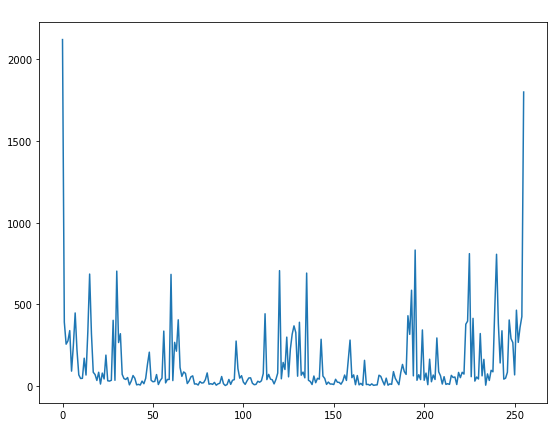

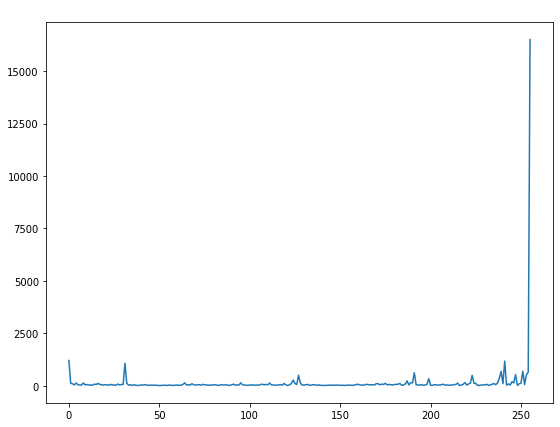

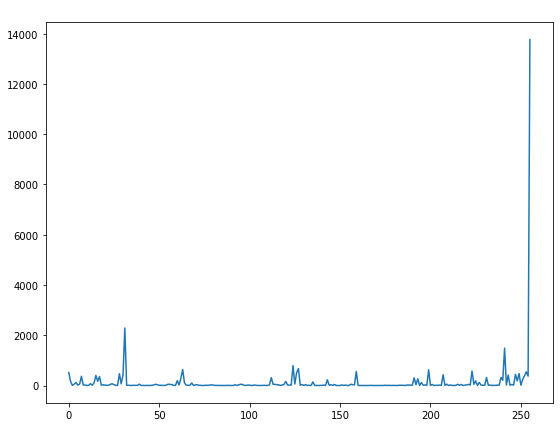

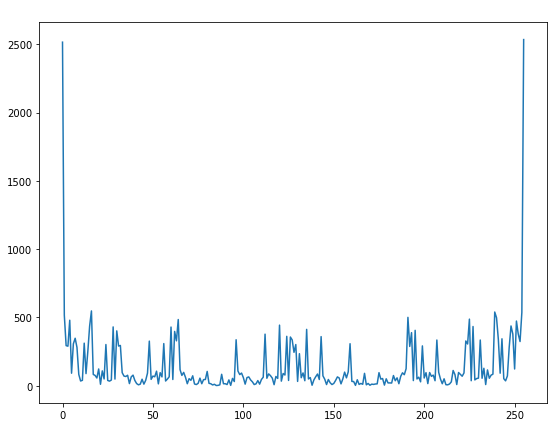

In [196]:
# ploteo histograma para cada imagen
for idx, i_lbp in enumerate(images_lbp):
  # remuevo bordes para evitar conteo de valores no válidos  
  i_lbp_aux = i_lbp[min_r: np.uint32(i_lbp.shape[0] - min_r), min_r: np.uint32(i_lbp.shape[1] - min_r)]
  hist, bins = np.histogram(i_lbp_aux.ravel(),256,[0,256])

  plt.figure(figsize=(20,7))
  plt.subplot(1, 2, 1)
  plt.title(f'Histograma de {image_list[idx]}', color="w")
  plt.plot(hist)



##### 3. Comparar los histogramas

__Conclusión__:  
En base a los histogramas dibujados en el punto anterior, se observa una mayor cantidad de niveles diferentes para las imágenes con mayor cantidad de bordes / contrastes que en las imágenes con menos texturas/más homogéneas.  
Las imágenes de las piedras (Imagen2.png) y la oveja (Imagen5.png) tienen un histograma con muchos valores en 0 que corresponden a pixeles donde todos sus vecinos poseen valores menores. 
Si bien en todas las imágenes el histograma tiene valores altos en las componentes de mayor orden, en las imágenes de pocos bordes se notan valores mucho más elevados debido a la homogeneidad de los niveles de gris de los píxeles con sus vecinos en términos generales.
